#### Importing :

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Reading data :

In [10]:
df = pd.read_csv("Amazon_DataSet.csv")
df

,reviewText,Sentiment
0,This is a one of the best apps acording to a b...,Positive
1,This is a pretty good version of the game for ...,Positive
2,this is a really cool game. there are a bunch ...,Positive
3,"This is a silly game and can be frustrating, b...",Positive
4,This is a terrific game on any pad. Hrs of fun...,Positive
...,...,...
19995,this app is fricken stupid.it froze on the kin...,Negative
19996,Please add me!!!!! I need neighbors! Ginger101...,Positive
19997,love it! this game. is awesome. wish it had m...,Positive
19998,I love love love this app on my side of fashio...,Positive


#### Cleaning data :

In [11]:
for i in range(len(df['reviewText'])):
    df['reviewText'][i] = re.sub(r'[^\w\s]', '', df['reviewText'][i])
df

,reviewText,Sentiment
0,This is a one of the best apps acording to a b...,Positive
1,This is a pretty good version of the game for ...,Positive
2,this is a really cool game there are a bunch o...,Positive
3,This is a silly game and can be frustrating bu...,Positive
4,This is a terrific game on any pad Hrs of fun ...,Positive
...,...,...
19995,this app is fricken stupidit froze on the kind...,Negative
19996,Please add me I need neighbors Ginger1016 than...,Positive
19997,love it this game is awesome wish it had more...,Positive
19998,I love love love this app on my side of fashio...,Positive


#### Tekonizing :

In [12]:
comment_texts = []
for i in range(len(df['reviewText'])):
    comment_texts.append(nltk.word_tokenize(df['reviewText'][i]))
comment_texts

[['This',
  'is',
  'a',
  'one',
  'of',
  'the',
  'best',
  'apps',
  'acording',
  'to',
  'a',
  'bunch',
  'of',
  'people',
  'and',
  'I',
  'agree',
  'it',
  'has',
  'bombs',
  'eggs',
  'pigs',
  'TNT',
  'king',
  'pigs',
  'and',
  'realustic',
  'stuff'],
 ['This',
  'is',
  'a',
  'pretty',
  'good',
  'version',
  'of',
  'the',
  'game',
  'for',
  'being',
  'free',
  'There',
  'are',
  'LOTS',
  'of',
  'different',
  'levels',
  'to',
  'play',
  'My',
  'kids',
  'enjoy',
  'it',
  'a',
  'lot',
  'too'],
 ['this',
  'is',
  'a',
  'really',
  'cool',
  'game',
  'there',
  'are',
  'a',
  'bunch',
  'of',
  'levels',
  'and',
  'you',
  'can',
  'find',
  'golden',
  'eggs',
  'super',
  'fun'],
 ['This',
  'is',
  'a',
  'silly',
  'game',
  'and',
  'can',
  'be',
  'frustrating',
  'but',
  'lots',
  'of',
  'fun',
  'and',
  'definitely',
  'recommend',
  'just',
  'as',
  'a',
  'fun',
  'time'],
 ['This',
  'is',
  'a',
  'terrific',
  'game',
  'on',
  'a

#### Removing stopwords :

In [13]:
stop_words = stopwords.words('english')
stop_words.append('I')
stop_words.append('This')
print('stop words are :')
print(stop_words, '\n')
for i in range(len(comment_texts)):
    text = ''
    for word in comment_texts[i]:
        if word not in stop_words:
            text += word
            text += ' ' 
    print(text)
    df['reviewText'][i] = text
df

stop words are :
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same'

,reviewText,Sentiment
0,one best apps acording bunch people agree bomb...,Positive
1,pretty good version game free There LOTS diffe...,Positive
2,really cool game bunch levels find golden eggs...,Positive
3,silly game frustrating lots fun definitely rec...,Positive
4,terrific game pad Hrs fun My grandkids love Gr...,Positive
...,...,...
19995,app fricken stupidit froze kindle wont allow p...,Negative
19996,Please add need neighbors Ginger1016 thanks bu...,Positive
19997,love game awesome wish free stuff houses didnt...,Positive
19998,love love love app side fashion story fights w...,Positive


#### Changing sentiments to 1 and 0 :

In [14]:
df.loc[df['Sentiment']=='Positive', 'Sentiment']= 1
df.loc[df['Sentiment']=='Negative', 'Sentiment']= 0
df

,reviewText,Sentiment
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free There LOTS diffe...,1
2,really cool game bunch levels find golden eggs...,1
3,silly game frustrating lots fun definitely rec...,1
4,terrific game pad Hrs fun My grandkids love Gr...,1
...,...,...
19995,app fricken stupidit froze kindle wont allow p...,0
19996,Please add need neighbors Ginger1016 thanks bu...,1
19997,love game awesome wish free stuff houses didnt...,1
19998,love love love app side fashion story fights w...,1


#### Ploting the percetages of sentiments :

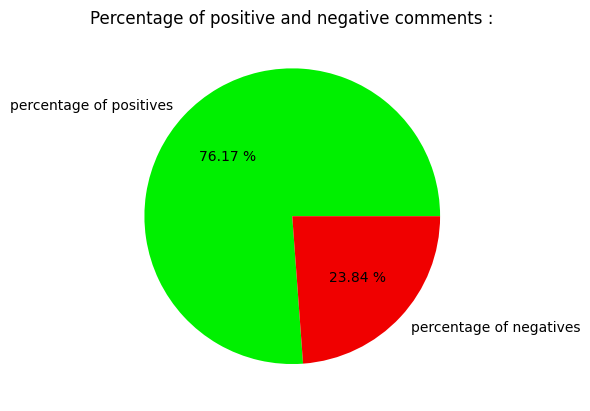

In [15]:
positives = df.loc[df['Sentiment']== 1].count()[0]
negatives = df.loc[df['Sentiment']== 0].count()[0]
labels = ['percentage of positives', 'percentage of negatives']
colors = ['#00f000', '#f00000']
plt.pie([positives, negatives], labels=labels, colors=colors, autopct='%0.2f %%')
plt.title('Percentage of positive and negative comments :')
plt.show()

#### CountVectorizing :

In [16]:
cv = CountVectorizer()
df_x = df['reviewText']
df_y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=2)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [17]:
x_traincv = cv.fit_transform(x_train)
x_traincv = x_traincv.toarray()
x_traincv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
x_testcv = cv.transform(x_test)
x_testcv = x_testcv.toarray()
x_testcv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Ploting train datas :

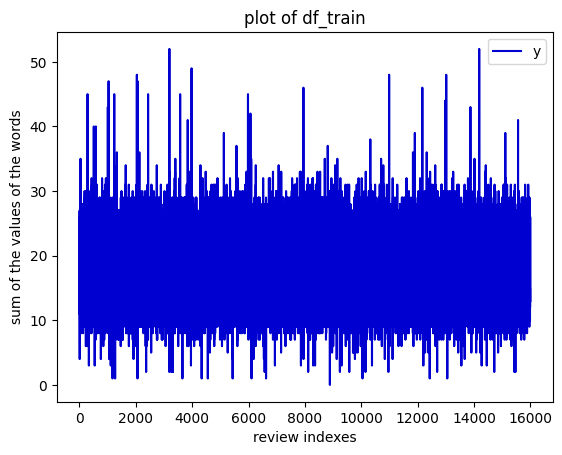

In [19]:
df_train_x = [x for x in range(len(x_traincv))]
df_train_y = np.sum(x_traincv, axis=1)
df_train = {'x': df_train_x,
            'y': df_train_y}
df_train = pd.DataFrame(df_train)
df_train.plot(x='x', y='y', color='#0000d0')
plt.ylabel('sum of the values of the words')
plt.xlabel('review indexes')
plt.title('plot of df_train')
plt.show()

#### Ploting test datas :

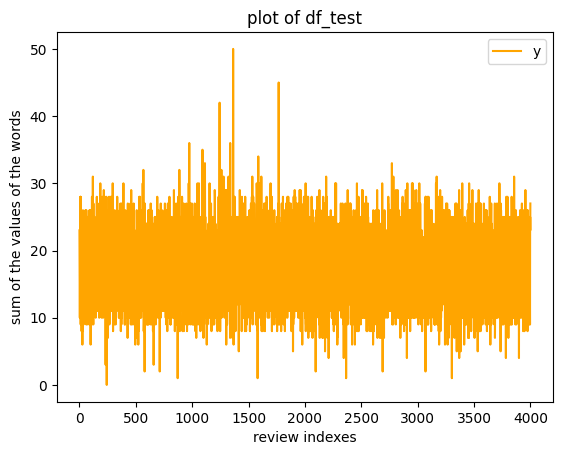

In [20]:
df_test_x = [x for x in range(len(x_testcv))]
df_test_y = np.sum(x_testcv, axis=1)
df_test = {'x': df_test_x,
            'y': df_test_y}
df_test = pd.DataFrame(df_test)
df_test.plot(x='x', y='y', color='orange')
plt.ylabel('sum of the values of the words')
plt.xlabel('review indexes')
plt.title('plot of df_test')
plt.show()

#### Training our model :

In [21]:
model = LogisticRegression()
model.fit(x_traincv, y_train)
print("done")

done


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Measuring the accuracy of our model :

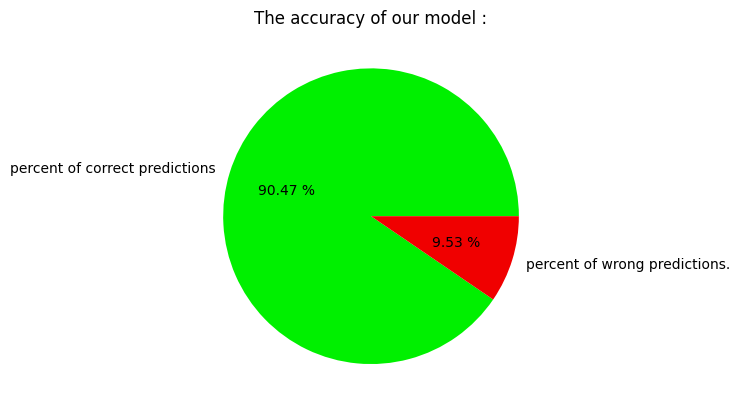

In [22]:
corrects = model.score(x_testcv, y_test)
wrongs = 1 - corrects
labels = ['percent of correct predictions', 'percent of wrong predictions.']
colors = ['#00f000', '#f00000']
plt.pie([corrects, wrongs], labels=labels, colors=colors, autopct='%0.2f %%')
plt.title('The accuracy of our model :')
plt.show()